# Lets try to predict the weather (2 clients)

## Average worker

This client is a guy who wants to go to work but he needs to know if he should take his umbrella. The cost of not taking the umbrella and getting wet is higher than taking the umbrella in a sunny day. But he does not want to take the umbrella everytime

## Ballplayer

This client is a baseball player. There is no baseball if it rains. So he wants to know if it is worth leaving his house to the baseball field. The cost of not going to the baseball field in a sunny day is higher than going to the baseball field in a rainy day. But he does not want to go to the baseball field unnecessarily at a high rate

# Variables descriptions


Variable | Description
---------|------------
Date   |  The date of observation
Location   |  The common name of the location of the weather station
MinTemp   |  The minimum temperature in degrees celsius
MaxTemp   |  The maximum temperature in degrees celsius
Rainfall   |  The amount of rainfall recorded for the day in mm
Evaporation   |  The so-called Class A pan evaporation (mm) in the 24 hours to 9am
Sunshine   |  The number of hours of bright sunshine in the day.
WindGustDir   |  The direction of the strongest wind gust in the 24 hours to midnight
WindGustSpeed   |  The speed (km/h) of the strongest wind gust in the 24 hours to midnight
WindDir9am   |  Direction of the wind at 9am
WindDir3pm   |  Direction of the wind at 3pm
WindSpeed9am   |  Wind speed (km/hr) averaged over 10 minutes prior to 9am
WindSpeed3pm   |  Wind speed (km/hr) averaged over 10 minutes prior to 3pm
Humidity9am   |  Humidity (percent) at 9am
Humidity3pm   |  Humidity (percent) at 3pm
Pressure9am   |  Atmospheric pressure (hpa) reduced to mean sea level at 9am
Pressure3pm   |  Atmospheric pressure (hpa) reduced to mean sea level at 3pm
Cloud9am   |  Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
Cloud3pm | Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
Temp9am |  Temperature (degrees C) at 9am
Temp3pm |  Temperature (degrees C) at 3pm
Precipitation9am |  The amount of rain in mm prior to 9am
Precipitation3pm |  The amount of rain in mm prior to 3pm
AmountOfRain |  The amount of rain in mm
Temp |  Temperature (degrees C)
Humidity |  Humidity (percent)
RainToday |  Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
RainTomorrow |  The target variable. Did it rain tomorrow?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Pedro\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading the data

In [3]:
pd.options.display.max_columns = None

In [4]:
rain_data=pd.read_csv("data/rain_data_aus.csv")

In [5]:
wind=pd.read_csv('data/wind.csv')

In [6]:
rain_data.head()

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,29.48,28.400000,12,5.115360,0.089825
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,32.12,2.208569,10,21.497100,0.023477
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,32.84,38.000000,17,20.782859,0.027580
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,35.60,21.200000,8,12.028646,0.023962
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,40.76,41.600000,9,11.883546,0.220164


In [7]:
wind.head()

,date,location,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,labels
0,2007-11-01,Canberra,NW,30.0,SW,NW,6.0,20.0,2
1,2007-11-02,Canberra,ENE,39.0,E,W,4.0,17.0,0
2,2007-11-03,Canberra,NW,85.0,N,NNE,6.0,6.0,0
3,2007-11-04,Canberra,NW,54.0,WNW,W,30.0,24.0,1
4,2007-11-05,Canberra,SSE,50.0,SSE,ESE,20.0,28.0,3


In [8]:
wind.dtypes

date               object
location           object
wind_gustdir       object
wind_gustspeed    float64
wind_dir9am        object
wind_dir3pm        object
wind_speed9am     float64
wind_speed3pm     float64
labels              int64
dtype: object

In [9]:
rain_data.dtypes

date                 object
location             object
mintemp             float64
maxtemp             float64
rainfall            float64
evaporation         float64
sunshine            float64
humidity9am         float64
humidity3pm         float64
pressure9am         float64
pressure3pm         float64
cloud9am            float64
cloud3pm            float64
temp9am             float64
temp3pm             float64
raintoday            object
amountOfRain        float64
raintomorrow         object
temp                float64
humidity            float64
precipitation3pm      int64
precipitation9am    float64
modelo_vigente      float64
dtype: object

In [10]:
wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164386 entries, 0 to 164385
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            164386 non-null  object 
 1   location        164386 non-null  object 
 2   wind_gustdir    153808 non-null  object 
 3   wind_gustspeed  153868 non-null  float64
 4   wind_dir9am     152958 non-null  object 
 5   wind_dir3pm     159551 non-null  object 
 6   wind_speed9am   162933 non-null  float64
 7   wind_speed3pm   160803 non-null  float64
 8   labels          164386 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 11.3+ MB


In [11]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   date              142193 non-null  object 
 1   location          142193 non-null  object 
 2   mintemp           141556 non-null  float64
 3   maxtemp           141871 non-null  float64
 4   rainfall          140787 non-null  float64
 5   evaporation       81350 non-null   float64
 6   sunshine          74377 non-null   float64
 7   humidity9am       140419 non-null  float64
 8   humidity3pm       138583 non-null  float64
 9   pressure9am       128179 non-null  float64
 10  pressure3pm       128212 non-null  float64
 11  cloud9am          88536 non-null   float64
 12  cloud3pm          85099 non-null   float64
 13  temp9am           141289 non-null  float64
 14  temp3pm           139467 non-null  float64
 15  raintoday         140787 non-null  object 
 16  amountOfRain      14

In [12]:
wind.shape

(164386, 9)

In [13]:
rain_data.shape

(142193, 23)

# Exploring and transforming the data

## Merging datasets

In [14]:
wind.set_index(['date','location'])

wind_gustdir  wind_gustspeed wind_dir9am wind_dir3pm  \
date       location                                                          
2007-11-01 Canberra             NW            30.0          SW          NW   
2007-11-02 Canberra            ENE            39.0           E           W   
2007-11-03 Canberra             NW            85.0           N         NNE   
2007-11-04 Canberra             NW            54.0         WNW           W   
2007-11-05 Canberra            SSE            50.0         SSE         ESE   
...                            ...             ...         ...         ...   
2017-06-25 Perth                 E            26.0          SE          SE   
           SalmonGums           SE            15.0         SSE           E   
           Walpole             SSW            20.0         WNW         SSW   
           Hobart               NW            50.0         NNW         NNW   
           Launceston           NW            50.0         NNW         NNW   

                       wind_speed9am  wind_speed3pm  labels  
date       location                                          
2007-11-01 Canberra              6.0           20.0       2  
2007-11-02 Canberra              4.0           17.0       0  
2007-11-03 Canberra              6.0            6.0       0  
2007-11-04 Canberra             30.0           24.0       1  
2007-11-05 Canberra             20.0           28.0       3  
...                              ...            ...     ...  
2017-06-25 Perth                 4.0           11.0       2  
           SalmonGums            7.0            6.0       2  
           Walpole               6.0            6.0       2  
           Hobart               17.0           28.0       3  
           Launceston           15.0           17.0       3  

[164386 rows x 7 columns]

In [15]:
data=rain_data.join(wind.set_index(['date','location']),on=['date','location'])

## Dummyfication 

In [16]:
data['raintoday']=data['raintoday'].apply(lambda x: 1 if x=='Yes' else (0 if x=='No' else np.nan))

In [17]:
data['raintomorrow']=data['raintomorrow'].apply(lambda x: 1 if x=='Yes' else (0 if x=='No' else np.nan))

In [18]:
data['wind_gustdir_simplified']=data['wind_gustdir'].apply(lambda x: x[0] if type(x)==str else np.nan)

In [19]:
data['wind_gustdir_E']=data['wind_gustdir_simplified'].apply(lambda x: 1 if x=='E' else 0)

In [20]:
data['wind_gustdir_N']=data['wind_gustdir_simplified'].apply(lambda x: 1 if x=='N' else 0)

In [21]:
data['wind_gustdir_S']=data['wind_gustdir_simplified'].apply(lambda x: 1 if x=='S' else 0)

In [22]:
data['wind_gustdir_W']=data['wind_gustdir_simplified'].apply(lambda x: 1 if x=='W' else 0)

## Dealing with nans and other dataset's issues

In [23]:
data.isna().sum()

date                           0
location                       0
mintemp                      772
maxtemp                      397
rainfall                    1619
evaporation                74258
sunshine                   83779
humidity9am                 2034
humidity3pm                 5124
pressure9am                16301
pressure3pm                16273
cloud9am                   63507
cloud3pm                   68670
temp9am                      976
temp3pm                     4077
raintoday                   1619
amountOfRain                   0
raintomorrow                   0
temp                         397
humidity                    5124
precipitation3pm               0
precipitation9am               0
modelo_vigente                 0
wind_gustdir               10578
wind_gustspeed             10518
wind_dir9am                11428
wind_dir3pm                 4835
wind_speed9am               1453
wind_speed3pm               3583
labels                         0
wind_gustd

In [24]:
data.shape

(164386, 35)

Above we observe that the variable raintoday is based on rainfall and not on amountOfRain. In the models we will use rainfall as it seems to be more reliable

In [25]:
data['raintoday'].value_counts()

0.0    126200
1.0     36567
Name: raintoday, dtype: int64

In [26]:
data.loc[data['raintoday']==1,'amountOfRain'].value_counts()

0.0      11758
0.2       3478
0.4       1553
0.6       1101
0.8        907
         ...  
106.0        1
91.0         1
113.4        1
98.2         1
4.1          1
Name: amountOfRain, Length: 630, dtype: int64

In [27]:
data.loc[data['mintemp']>data['maxtemp']]

,date,location,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustdir,wind_gustspeed,wind_dir9am,wind_dir3pm,wind_speed9am,wind_speed3pm,labels,wind_gustdir_simplified,wind_gustdir_E,wind_gustdir_N,wind_gustdir_S,wind_gustdir_W


In [28]:
data.loc[data['raintoday']==1,'rainfall'].value_counts()

1.2      1750
1.4      1599
1.6      1377
1.8      1250
2.0      1177
         ... 
167.0       1
127.6       1
33.9        1
13.1        1
104.6       1
Name: rainfall, Length: 668, dtype: int64

Above we see that sunshine and other variables depend on the cities to be registered

In [29]:
data['sunshine'].value_counts()

0.0     2553
10.7    1160
11.0    1153
10.8    1138
10.5    1109
        ... 
14.0      16
14.1       7
14.3       4
14.2       2
14.5       1
Name: sunshine, Length: 145, dtype: int64

In [30]:
data.groupby('location').mean()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustspeed,wind_speed9am,wind_speed3pm,labels,wind_gustdir_E,wind_gustdir_N,wind_gustdir_S,wind_gustdir_W
location,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Adelaide,12.538624,22.861178,1.625367,5.824924,7.752002,59.994639,45.242381,1018.730246,1016.771880,NaN,NaN,16.903499,21.521580,0.225194,1.617357,0.224007,28.046256,54.954834,10.052691,10.006718,0.188529,36.092819,9.718962,15.168736,1.708932,0.096365,0.260919,0.294731,0.340659
Albany,12.853903,19.979238,2.261720,4.308122,6.630663,75.505462,67.392487,1018.273217,1016.499272,5.188436,4.808703,16.110015,18.412974,0.302624,2.273260,0.304072,24.868309,80.193375,10.009241,9.913054,0.317938,NaN,12.644103,19.001305,1.188276,0.000000,0.000000,0.000000,0.000000
Albury,9.476567,22.536642,1.923171,NaN,NaN,74.521224,48.235056,1018.388982,1015.792839,6.356091,5.381587,14.283598,21.265204,0.206446,1.912085,0.206230,27.719232,57.874174,9.989040,9.970921,0.196727,32.787677,8.179902,14.386994,1.680992,0.129218,0.264782,0.235362,0.367753
AliceSprings,13.057278,29.202125,0.851094,9.248823,9.590290,39.967816,24.279758,1016.764370,1012.950819,2.979363,3.344924,21.225976,27.956519,0.080069,0.875144,0.081515,35.448744,30.162267,10.014351,10.065199,0.102462,40.317771,14.622631,18.012924,1.879162,0.428530,0.172216,0.327497,0.055396
BadgerysCreek,11.126980,24.050460,2.210729,NaN,NaN,76.995795,51.574347,1018.449133,1015.618709,NaN,NaN,16.592578,22.518741,0.197107,2.196262,0.196974,29.568422,62.229038,9.972708,10.100505,0.202926,33.456904,8.027172,13.909200,1.648769,0.262237,0.218629,0.308514,0.205280
Ballarat,7.343492,18.184284,1.733928,NaN,NaN,82.402196,59.602240,1017.832266,1016.256392,5.913397,6.305913,11.609347,16.694231,0.260782,1.779020,0.261106,22.761476,71.602793,9.928633,9.999439,0.282206,44.927808,19.939098,22.810958,1.895959,0.047005,0.372026,0.371167,0.202350
Bendigo,8.595387,21.498052,1.658881,3.851730,NaN,71.008319,46.981662,1018.004861,1015.860655,4.562284,4.977147,13.762396,20.132092,0.189670,1.656144,0.189344,26.391808,56.242154,10.127471,9.973601,0.193707,38.688767,12.787271,17.089163,1.816385,0.041249,0.311945,0.406187,0.229734
Brisbane,16.475152,26.503404,3.086304,5.459438,8.097142,63.791482,53.674612,1018.269292,1015.135647,3.889411,3.855365,21.872843,24.799640,0.220084,3.069928,0.219458,32.204664,64.416477,9.978718,9.829047,0.207628,28.042246,6.893035,10.909292,1.854063,0.408513,0.190713,0.192648,0.202598
Cairns,21.259924,29.556173,5.665634,6.395025,7.575636,70.283363,62.084656,1014.210523,1011.163639,4.627374,4.500496,25.824897,27.928395,0.320727,5.628630,0.320988,35.585547,74.415261,10.035273,10.069608,0.323811,38.149660,15.969430,21.927080,2.380071,0.230159,0.183128,0.565256,0.014991


In [31]:
data_missingless=data.dropna()

# Exploration

Lets take a look at the categorical variables

In [32]:
data_missingless.dtypes

date                        object
location                    object
mintemp                    float64
maxtemp                    float64
rainfall                   float64
evaporation                float64
sunshine                   float64
humidity9am                float64
humidity3pm                float64
pressure9am                float64
pressure3pm                float64
cloud9am                   float64
cloud3pm                   float64
temp9am                    float64
temp3pm                    float64
raintoday                  float64
amountOfRain               float64
raintomorrow                 int64
temp                       float64
humidity                   float64
precipitation3pm             int64
precipitation9am           float64
modelo_vigente             float64
wind_gustdir                object
wind_gustspeed             float64
wind_dir9am                 object
wind_dir3pm                 object
wind_speed9am              float64
wind_speed3pm       

In [33]:
data_missingless.groupby('wind_gustdir').mean()[['rainfall','raintoday','raintomorrow']]

,rainfall,raintoday,raintomorrow
wind_gustdir,,,
E,1.672752,0.149134,0.158210
ENE,1.432233,0.137578,0.149198
ESE,1.948206,0.175473,0.174060
N,1.258458,0.152463,0.274946
NE,1.554145,0.128406,0.178261
NNE,1.189531,0.134657,0.236823
NNW,1.607171,0.187841,0.271239
NW,2.098567,0.238225,0.289078
S,2.725377,0.276232,0.218790


In [34]:
data_missingless.groupby('wind_dir9am').mean()[['rainfall','raintoday','raintomorrow']]

,rainfall,raintoday,raintomorrow
wind_dir9am,,,
E,1.282777,0.113908,0.138242
ENE,1.248335,0.112512,0.169125
ESE,1.739009,0.149225,0.148948
N,1.231413,0.173382,0.310665
NE,1.315378,0.143440,0.216113
NNE,1.114147,0.144521,0.284605
NNW,1.892718,0.243043,0.291297
NW,2.130511,0.239137,0.259435
S,3.491872,0.293145,0.209428


Lets look at modelo_vigente

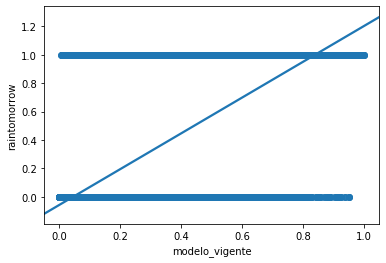

In [35]:
sns.regplot(data_missingless['modelo_vigente'],data_missingless['raintomorrow'])

Maybe we will try modelo_vigente as our baseline

What is labels?

(array([33201.,     0.,     0., 24429.,     0.,     0., 51985.,     0.,
            0., 54771.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

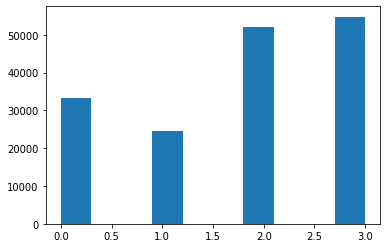

In [36]:
plt.hist(data['labels'])

In [37]:
data_missingless.groupby('labels').mean()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustspeed,wind_speed9am,wind_speed3pm,wind_gustdir_E,wind_gustdir_N,wind_gustdir_S,wind_gustdir_W
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,13.620849,25.217218,2.428788,5.755437,7.780119,67.106718,48.894190,1015.673996,1013.156274,4.345673,4.449163,18.704257,23.474622,0.231491,3.401957,0.278596,30.775010,59.174145,9.979020,9.837479,0.254125,45.974985,9.336998,21.217470,0.163910,0.289490,0.337200,0.209401
1,13.898696,23.367294,3.296908,6.413597,7.165021,60.296145,49.077947,1013.247663,1011.503306,4.612218,4.895325,18.066660,21.566716,0.325107,3.838676,0.361892,28.717062,59.211281,10.056156,10.058447,0.331164,60.987987,27.440864,28.721922,0.142578,0.303502,0.271838,0.282082
2,11.950739,23.205915,1.516583,4.211974,7.537171,72.122669,52.270237,1020.075826,1017.296796,4.100869,4.114370,16.871466,21.932241,0.172080,1.445305,0.151386,28.497725,62.867575,9.985559,10.013001,0.171829,27.685166,8.392851,13.214408,0.234383,0.276268,0.319648,0.169701
3,14.396398,24.854440,1.958963,5.897947,8.070583,63.224921,48.307314,1017.528900,1015.067552,4.139210,4.175981,19.002934,23.398832,0.207930,1.908549,0.185052,30.396871,58.281938,10.038984,9.999126,0.192556,39.423426,18.380105,19.813399,0.234435,0.232931,0.368689,0.163945


I dont know, maybe it is some type of cluster

(array([47729.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13595.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

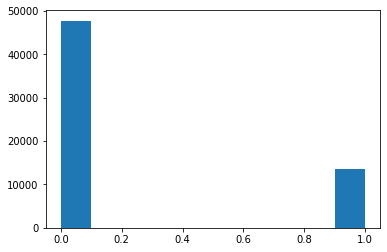

In [38]:
plt.hist(data_missingless['raintoday'])

In [39]:
data_missingless.corr()

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,raintomorrow,temp,humidity,precipitation3pm,precipitation9am,modelo_vigente,wind_gustspeed,wind_speed9am,wind_speed3pm,labels,wind_gustdir_E,wind_gustdir_N,wind_gustdir_S,wind_gustdir_W
mintemp,1.000000,0.751131,0.108920,0.504563,0.078985,-0.172991,0.069594,-0.466959,-0.487898,0.104685,0.037394,0.906678,0.728575,0.046411,0.141326,0.085544,0.585605,0.062698,0.003044,-0.000448,0.130681,0.111325,0.099693,0.134473,0.031346,0.175238,-0.019570,-0.010881,-0.144759
maxtemp,0.751131,1.000000,-0.070474,0.645171,0.464880,-0.488880,-0.444525,-0.340065,-0.441244,-0.261306,-0.261202,0.894113,0.984556,-0.221972,-0.016351,-0.146448,0.780458,-0.404043,0.003950,-0.001311,-0.219010,0.030005,-0.011993,0.015914,0.007149,0.200371,0.045986,-0.073480,-0.169321
rainfall,0.108920,-0.070474,1.000000,-0.074045,-0.242960,0.261640,0.275481,-0.179367,-0.135641,0.214724,0.188844,0.013191,-0.075299,0.550403,0.294001,0.249993,-0.061899,0.252958,-0.009644,-0.004275,0.373576,0.105783,0.049685,0.043294,-0.047648,-0.034212,-0.053683,0.045581,0.040856
evaporation,0.504563,0.645171,-0.074045,1.000000,0.365619,-0.549290,-0.415304,-0.295733,-0.323086,-0.193361,-0.199779,0.590351,0.623806,-0.215441,-0.042377,-0.126794,0.505210,-0.376074,0.009231,-0.000972,-0.185670,0.206127,0.190176,0.127353,-0.025148,0.111896,-0.051915,0.037483,-0.101250
sunshine,0.078985,0.464880,-0.242960,0.365619,1.000000,-0.498152,-0.627710,0.044250,-0.019505,-0.676787,-0.703123,0.290785,0.486674,-0.325735,-0.297510,-0.450817,0.359636,-0.571155,-0.001739,0.004112,-0.651491,-0.052478,-0.013522,0.033990,0.050506,0.113242,-0.033439,-0.017702,-0.057547
humidity9am,-0.172991,-0.488880,0.261640,-0.549290,-0.498152,1.000000,0.682516,0.117002,0.173397,0.433127,0.345627,-0.419391,-0.479974,0.377567,0.179094,0.267304,-0.382191,0.620706,-0.005130,0.000041,0.399985,-0.196586,-0.240400,-0.107701,-0.019414,-0.085611,-0.023779,0.054713,0.049178
humidity3pm,0.069594,-0.444525,0.275481,-0.415304,-0.627710,0.682516,1.000000,-0.061850,0.024021,0.504211,0.508928,-0.151021,-0.494088,0.381983,0.313294,0.452579,-0.347821,0.909306,-0.004565,-0.000998,0.655662,-0.045567,-0.062997,0.022707,-0.006601,-0.051722,-0.023260,0.046158,0.024053
pressure9am,-0.466959,-0.340065,-0.179367,-0.295733,0.044250,0.117002,-0.061850,1.000000,0.961335,-0.151748,-0.165347,-0.433974,-0.299276,-0.187663,-0.170150,-0.254683,-0.262955,-0.054818,-0.003109,0.003460,-0.377505,-0.434927,-0.202079,-0.295709,0.173958,0.097275,-0.051368,0.091622,-0.151402
pressure3pm,-0.487898,-0.441244,-0.135641,-0.323086,-0.019505,0.173397,0.024021,0.961335,1.000000,-0.084141,-0.102970,-0.491718,-0.410349,-0.105297,-0.170059,-0.231582,-0.342480,0.023314,-0.003299,0.003799,-0.328828,-0.388885,-0.156239,-0.256598,0.161178,0.049315,-0.123489,0.155629,-0.097765
cloud9am,0.104685,-0.261306,0.214724,-0.193361,-0.676787,0.433127,0.504211,-0.151748,-0.084141,1.000000,0.612153,-0.108630,-0.278550,0.293103,0.204720,0.321644,-0.203093,0.457588,-0.000492,0.001017,0.480683,0.089123,0.032950,0.065776,-0.044892,-0.080598,-0.013037,0.053303,0.033692


In [40]:
data_missingless.corr()['raintomorrow'].sort_values(ascending=False)

raintomorrow        1.000000
modelo_vigente      0.839977
amountOfRain        0.489956
humidity3pm         0.452579
humidity            0.410263
cloud3pm            0.387231
cloud9am            0.321644
raintoday           0.305072
humidity9am         0.267304
rainfall            0.249993
wind_gustspeed      0.230636
wind_speed3pm       0.086321
mintemp             0.085544
wind_speed9am       0.081749
wind_gustdir_W      0.064083
wind_gustdir_N      0.042005
precipitation3pm    0.005888
precipitation9am   -0.013297
temp9am            -0.017739
wind_gustdir_S     -0.027980
wind_gustdir_E     -0.075864
temp               -0.113155
labels             -0.125690
evaporation        -0.126794
maxtemp            -0.146448
temp3pm            -0.182559
pressure3pm        -0.231582
pressure9am        -0.254683
sunshine           -0.450817
Name: raintomorrow, dtype: float64

In [41]:
data_missingless.corr()['modelo_vigente'].sort_values(ascending=False)

modelo_vigente      1.000000
raintomorrow        0.839977
humidity3pm         0.655662
humidity            0.596045
cloud3pm            0.560123
amountOfRain        0.495022
cloud9am            0.480683
raintoday           0.455939
humidity9am         0.399985
rainfall            0.373576
wind_gustspeed      0.258391
mintemp             0.130681
wind_speed9am       0.103443
wind_speed3pm       0.103314
wind_gustdir_W      0.087156
wind_gustdir_N      0.045969
precipitation3pm    0.002687
precipitation9am   -0.009201
wind_gustdir_S     -0.029670
temp9am            -0.030485
wind_gustdir_E     -0.100737
labels             -0.135078
temp               -0.167708
evaporation        -0.185670
maxtemp            -0.219010
temp3pm            -0.269893
pressure3pm        -0.328828
pressure9am        -0.377505
sunshine           -0.651491
Name: modelo_vigente, dtype: float64

# Model Baseline

In [42]:
from sklearn.metrics import precision_score, recall_score

Simplest model ever

In [43]:
y_pred_low=data['raintomorrow'].apply(lambda x: 0)

In [44]:
y_pred_high=data['raintomorrow'].apply(lambda x: 1)

## Average worker

In [45]:
precision_score(data['raintomorrow'],y_pred_high)

0.225371990315477

In [46]:
recall_score(data['raintomorrow'],y_pred_high)

1.0

This model always predicts it is going to rain. For the average worker it means that he will always take an umbrella. But only 22% of the time the umbrella will be usefull

## Ballplayer

In [47]:
1-precision_score(data['raintomorrow'],y_pred_high)

0.7746280096845231

In [48]:
recall_score(data['raintomorrow'],y_pred_low)

0.0

This model always predicts that is not going to rain. Which means that the ballplayer will go to the ballpark but in 22% of the time there wont be any games to be played

# Before we make our models lets separate the dataset in train, test

In [49]:
data_missingless.columns

Index(['date', 'location', 'mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'raintomorrow', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'modelo_vigente', 'wind_gustdir', 'wind_gustspeed',
       'wind_dir9am', 'wind_dir3pm', 'wind_speed9am', 'wind_speed3pm',
       'labels', 'wind_gustdir_simplified', 'wind_gustdir_E', 'wind_gustdir_N',
       'wind_gustdir_S', 'wind_gustdir_W'],
      dtype='object')

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data_missingless[['mintemp', 'maxtemp', 'rainfall', 'evaporation',
       'sunshine', 'humidity9am', 'humidity3pm', 'pressure9am', 'pressure3pm',
       'cloud9am', 'cloud3pm', 'temp9am', 'temp3pm', 'raintoday',
       'amountOfRain', 'temp', 'humidity', 'precipitation3pm',
       'precipitation9am', 'wind_gustspeed',
        'wind_speed3pm', 'wind_gustdir_E', 'wind_gustdir_N',
       'wind_gustdir_S', 'wind_gustdir_W']], data_missingless['raintomorrow'], test_size=0.25, random_state=42)

# Model Modelo Vigente

Lets use modelo_vigente to predict

In [52]:
y_pred_vigente_high=(data['modelo_vigente']>0.65).astype(int)

In [53]:
y_pred_vigente_low=(data['modelo_vigente']>0.15).astype(int)

In [165]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

## Average worker

In [55]:
precision_score(data['raintomorrow'],y_pred_vigente_low)

0.5080728716974616

In [56]:
recall_score(data['raintomorrow'],y_pred_vigente_low)

0.9530069099546534

In [100]:
roc_auc_score(data['raintomorrow'],y_pred_vigente_low)

0.8422740811847432

In this model for the average worker, he is gonna have to deal with low precision and high recall. Which means when the model, he is going to guess wrong half the time (meaning the worker will take the umbrella unnecessarily). But the model is gonna capture 95% of the time is gonna rain (so it reduces the chances of getting wet)

## Ballplayer

In [57]:
precision_score(data['raintomorrow'],y_pred_vigente_high)

0.9505960800161649

In [58]:
recall_score(data['raintomorrow'],y_pred_vigente_high)

0.50793565104729

In [101]:
roc_auc_score(data['raintomorrow'],y_pred_vigente_low)

0.8422740811847432

In this model for the ballplayer, he is gonna have to deal with high precision and low recall. Which means that the model will only capture half the time that is gonna rain (meaning the ballplayer will drive to the ballpark unnecessarily). But when the model says that it is going to rain, the chances of getting it wrong are 5% (so it reduces the chances of not going to the ballpark in a good day to play baseball)

## Conclusion

This seems to be a good model. But maybe it is overfitted, since we dont know the origin of it. The ideal would be to test it with some dataset that we have never seem before

# Standardization

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
scaler = StandardScaler()

In [61]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [62]:
X_train_std=scaler.transform(X_train)

In [63]:
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [64]:
X_test_std=scaler.transform(X_test)

# Our first Model (finally!)

In [65]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train_std, y_train)

C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
model.coef_

array([[-7.58076172e-02, -3.67022547e-02, -8.69285995e-03,
        -6.53600625e-02, -7.54706377e-02, -3.12513296e-02,
         2.93552047e-01,  1.31882908e-01, -2.65201453e-01,
        -2.57707275e-02,  1.53377115e-01,  1.00368818e-01,
         2.52796128e-02,  3.57596977e-02,  3.88535011e+01,
        -1.51853215e-02, -2.49100253e-02,  1.48060959e-02,
        -1.87476172e-02,  9.02405441e-02, -1.30947613e-02,
        -1.76321042e-02, -1.52412395e-03,  7.26015383e-03,
         1.11114071e-02]])

In [69]:
pd.DataFrame(data=model.coef_[0],index=X_train.columns,columns=['coef']).sort_values('coef',ascending=False)

,coef
amountOfRain,38.853501
humidity3pm,0.293552
cloud3pm,0.153377
pressure9am,0.131883
temp9am,0.100369
wind_gustspeed,0.090241
raintoday,0.035760
temp3pm,0.025280
precipitation3pm,0.014806
wind_gustdir_W,0.011111


In [70]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_validate

In [71]:
cross_val_score(model, X_train_std, y_train, cv=KFold(6, shuffle=True), scoring='precision', n_jobs=-1)

array([0.99937422, 0.99938462, 1.        , 0.99937539, 1.        ,
       0.99940156])

In [72]:
cross_val_score(model, X_train_std, y_train, cv=KFold(6, shuffle=True), scoring='recall', n_jobs=-1)

array([0.96956786, 0.97133028, 0.97592593, 0.96880624, 0.96729776,
       0.96948762])

In [73]:
cross_val_score(model, X_train_std, y_train, cv=KFold(6, shuffle=True), scoring='roc_auc', n_jobs=-1)

array([0.99996048, 0.99996477, 0.99998148, 0.99994343, 0.99993193,
       0.99997233])

In [74]:
data[['amountOfRain','rainfall']].head(20)

,amountOfRain,rainfall
0,0.0,0.6
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.2,1.0
5,0.0,0.2
6,0.0,0.0
7,0.0,0.0
8,1.4,0.0
9,0.0,1.4


Ok, its clear that the coef of amountOfRain is super high because there is a data leak. This variable is the amount of rain in the next day. So of course it will be a good variable to predict if it will rain tomorrow. However, we should not have this information. We will remove this from the model.

# Logistic Regression

In [75]:
pd.DataFrame(X_test_std,columns=X_train.columns)

,mintemp,maxtemp,rainfall,evaporation,sunshine,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,amountOfRain,temp,humidity,precipitation3pm,precipitation9am,wind_gustspeed,wind_speed3pm,wind_gustdir_E,wind_gustdir_N,wind_gustdir_S,wind_gustdir_W
0,-1.823203,-1.109087,-0.281460,-0.932913,0.158475,0.491839,0.358723,3.092749,3.143567,0.983724,0.624905,-1.052638,-1.233840,-0.540985,-0.270034,-0.763206,0.400557,1.891522,-0.702434,0.014100,0.497839,-0.514717,-0.600583,1.424935,-0.492937
1,0.479626,0.493555,-0.310008,0.245973,0.371489,0.273112,0.107848,0.084678,-0.212587,-0.094448,-1.643277,0.803693,0.561759,-0.540985,-0.270034,0.542304,0.165506,-0.311278,-0.468423,-0.731535,0.264733,-0.514717,1.665050,-0.701786,-0.492937
2,-1.714286,-0.430491,-0.310008,-0.932913,0.051968,0.874610,0.258373,0.929803,0.723679,-0.094448,-0.131155,-1.372171,-0.748145,-0.540985,-0.270034,-0.210422,0.306536,0.318093,-1.046291,-0.955226,-1.250459,-0.514717,1.665050,-0.701786,-0.492937
3,1.662161,2.110635,-0.310008,1.746374,1.303423,-1.586063,-1.848977,-1.390709,-1.408127,-1.172620,-0.131155,1.777506,2.166023,-0.540985,-0.270034,1.859574,-1.667895,1.262150,-0.706128,0.386917,1.197158,-0.514717,-0.600583,-0.701786,2.028657
4,1.817757,1.330971,-0.310008,0.192388,0.930649,0.655884,0.659773,-0.602881,-0.803155,-1.172620,-0.509186,1.625348,1.341814,-0.540985,-0.270034,1.224462,0.682619,-0.940650,-1.298894,-0.955226,-1.017353,1.942814,-0.600583,-0.701786,-0.492937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15326,-0.905183,-1.383413,0.004029,-0.450641,-1.758648,-0.328386,0.459073,-0.631529,-0.918388,0.983724,1.002936,-0.763538,-1.292712,1.848481,-0.177112,-0.986671,0.494577,0.318093,-0.225201,2.101877,0.964052,-0.514717,1.665050,-0.701786,-0.492937
15327,-0.671788,-1.599986,-0.310008,-1.308014,-2.051541,1.421426,1.964323,0.929803,0.824508,1.343115,1.380966,-1.174365,-1.454610,-0.540985,-0.084190,-1.163091,1.904886,-1.255336,-1.161010,-1.402607,-0.784246,1.942814,-0.600583,-0.701786,-0.492937
15328,-0.002723,-0.387176,-0.310008,0.245973,0.611129,-1.640745,-1.146527,-0.445316,-0.313416,-1.532011,-1.643277,-0.200552,-0.321322,-0.540985,-0.270034,-0.175138,-1.009751,-0.625964,0.096555,1.132552,1.313711,-0.514717,-0.600583,-0.701786,2.028657
15329,-1.480891,-1.022457,-0.053069,-0.986499,-0.427313,0.819928,1.613098,-0.430991,-0.255799,-0.813230,1.002936,-1.113502,-1.174968,1.848481,-0.223573,-0.692638,1.575814,1.262150,-0.478184,0.014100,0.730945,-0.514717,-0.600583,-0.701786,2.028657


In [76]:
X_train_std_2=pd.DataFrame(X_train_std,columns=X_train.columns).drop(columns=['amountOfRain'])
X_test_std_2=pd.DataFrame(X_test_std,columns=X_test.columns).drop(columns=['amountOfRain'])

In [77]:
lg=LogisticRegression()
lg.fit(X_train_std_2,y_train)

C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
pd.DataFrame(data=lg.coef_[0],index=X_train_std_2.columns,columns=['coef']).sort_values('coef',ascending=False)

,coef
humidity3pm,1.148448
pressure9am,1.025943
wind_gustspeed,0.700185
cloud3pm,0.333680
temp9am,0.288763
raintoday,0.204234
maxtemp,0.162752
wind_gustdir_W,0.063551
rainfall,0.061127
humidity9am,0.044585


In [79]:
cross_val_score(lg, X_train_std_2, y_train, cv=KFold(6, shuffle=True), scoring='precision', n_jobs=-1).mean()

0.7274233164014423

In [80]:
cross_val_score(lg, X_train_std_2, y_train, cv=KFold(6, shuffle=True), scoring='recall', n_jobs=-1).mean()

0.5320077685800223

In [81]:
cross_val_score(lg, X_train_std_2, y_train, cv=KFold(6, shuffle=True), scoring='roc_auc', n_jobs=-1).mean()

0.8834109077704991

Lets try dropping the variables with the smallest (in absolute terms) coeficients to see what happens to the model

In [82]:
X_train_std_3=pd.DataFrame(X_train_std_2,columns=X_train.columns).drop(columns=['wind_gustdir_S','wind_gustdir_N',
                                                                               'temp','temp3pm','humidity',
                                                                                'amountOfRain','precipitation3pm'])
X_test_std_3=pd.DataFrame(X_test_std_2,columns=X_test.columns).drop(columns=['wind_gustdir_S','wind_gustdir_N',
                                                                               'temp','temp3pm','humidity',
                                                                            'amountOfRain','precipitation3pm'])

In [83]:
lg2=LogisticRegression()
lg2.fit(X_train_std_3,y_train)

C:\Users\Pedro\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
pd.DataFrame(data=lg2.coef_[0],index=X_train_std_3.columns,columns=['coef']).sort_values('coef',ascending=False)

,coef
humidity3pm,1.132802
pressure9am,1.022168
wind_gustspeed,0.699973
cloud3pm,0.333955
temp9am,0.284385
raintoday,0.204566
maxtemp,0.149933
wind_gustdir_W,0.066375
rainfall,0.060851
humidity9am,0.042584


In [85]:
cross_val_score(lg2, X_train_std_3, y_train, cv=KFold(6, shuffle=True), scoring='precision', n_jobs=-1).mean()

0.726315584616564

In [86]:
cross_val_score(lg2, X_train_std_3, y_train, cv=KFold(6, shuffle=True), scoring='recall', n_jobs=-1).mean()

0.5332837273061378

In [87]:
cross_val_score(lg2, X_train_std_3, y_train, cv=KFold(6, shuffle=True), scoring='roc_auc', n_jobs=-1).mean()

0.8835276734503136

It seems just a bit better without the less significants variables. We will consider this model (lg2)
as the best Logistic Regression model

In [117]:
y_pred_high=(lg2.predict_proba(X_train_std_3)[:,1]>0.65).astype(int)
y_pred_low=(lg2.predict_proba(X_train_std_3)[:,1]>0.1).astype(int)

In [118]:
precision_score(y_train,y_pred_high)

0.8071598101265823

In [119]:
recall_score(y_train,y_pred_high)

0.40191057711246797

In [120]:
precision_score(y_train,y_pred_low)

0.4082141451253116

In [122]:
recall_score(y_train,y_pred_low)

0.9191451644672051

# K Neighbors Classifier

In [88]:
from sklearn.neighbors import KNeighborsClassifier

In [89]:
n_neighbors = list(range(1,30))
p=[1,2]
hyperparameters = dict(n_neighbors=n_neighbors, p=p)

In [90]:
knn=KNeighborsClassifier()

In [92]:
from sklearn.model_selection import GridSearchCV

In [94]:
grid_search = GridSearchCV(knn, 
                           hyperparameters, 
                           cv=KFold(4), 
                           scoring='roc_auc', 
                           n_jobs=-1,
                           verbose=True)

In [95]:
grid_search.fit(X_train_std_2,y_train)

Fitting 4 folds for each of 58 candidates, totalling 232 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 232 out of 232 | elapsed: 27.1min finished


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=True)

In [96]:
grid_search.best_params_

{'n_neighbors': 29, 'p': 1}

In [97]:
grid_search.best_score_

0.877692432556663

# Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier

In [148]:
max_depth = list(range(1,10,2))
min_samples_split=list(range(2,20,4))
min_samples_leaf=list(range(1,20,4))
hyperparameters = dict(max_depth=max_depth, min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)

In [150]:
treeclass = DecisionTreeClassifier()

In [151]:
grid_search = GridSearchCV(treeclass, 
                           hyperparameters, 
                           cv=KFold(4), 
                           scoring='roc_auc', 
                           n_jobs=-1,
                           verbose=True)

In [152]:
grid_search.fit(X_train_std_3,y_train)

Fitting 4 folds for each of 125 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   29.3s finished


GridSearchCV(cv=KFold(n_splits=4, random_state=None, shuffle=False),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9],
                    

In [155]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_leaf': 17, 'min_samples_split': 6}

In [156]:
grid_search.best_score_

0.8630082223462597